In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import reverse_geocoder as rg
from geopy.distance import geodesic
from os.path import join
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [69]:
d_path = "./data"
filename = "taxi-trips.csv"
df = pd.read_csv(join(d_path, filename)) #Importing taxi-trips.cvs

In [70]:
df.head() #Checking if it is imported or not

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695


In [71]:
n_rows, n_columns = df.shape  
print("number of rows: {}, number of columns: {}".format(n_rows, n_columns)) # Getting the shape of dataframe

number of rows: 118185, number of columns: 11


In [72]:
df #Checking the whole dataframe with 118185 rows and 11 columns

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695
5,id0970832,1,2016-03-12 20:39:39,2016-03-12 21:05:40,1,-74.008247,40.747353,-73.979446,40.718750,N,1561
6,id2049424,2,2016-03-02 20:15:07,2016-03-02 20:37:43,1,-73.963890,40.773651,-74.005112,40.751492,N,1356
7,id0038484,2,2016-03-09 13:41:11,2016-03-09 13:53:27,2,-73.972855,40.764400,-73.971809,40.757889,N,736
8,id3092788,2,2016-03-03 22:01:32,2016-03-03 22:17:44,2,-73.984772,40.710571,-73.989410,40.730148,N,972
9,id3863815,2,2016-03-14 04:24:36,2016-03-14 04:37:11,3,-73.944359,40.714489,-73.910530,40.709492,N,755


In [73]:
df.describe() #Describing the dataframe

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000,118185.000000
mean,1.534958,1.657148,-73.973971,40.751392,-73.973538,40.752212,927.186310
std,0.498779,1.313844,0.040456,0.027958,0.039192,0.032284,3118.710246
min,1.000000,0.000000,-79.487900,40.225803,-79.487900,40.225800,1.000000
25%,1.000000,1.000000,-73.991875,40.737835,-73.991394,40.736462,393.000000
50%,2.000000,1.000000,-73.981796,40.754501,-73.979759,40.754848,652.000000
75%,2.000000,2.000000,-73.967575,40.768471,-73.962990,40.770077,1048.000000
max,2.000000,6.000000,-73.425018,41.292198,-73.055977,41.292198,86366.000000


In [74]:
coord_pick= list (map(tuple, df.loc[:, ['pickup_latitude', 'pickup_longitude']]. values)) #Creating a list with the pickup longitude and latitude
picks = rg.search(coord_pick) #Locating areas with the given longitude and latitude by the help of reverse geocoder
picklist = list()
for i in picks:
    picklist.append(i['name']) #Appending names of locations to an empty list called picklist
df['pickup_district'] = picklist #Instering that column to the dataframe

In [75]:
coord_drop= list (map(tuple, df.loc[:, ['dropoff_latitude', 'dropoff_longitude']]. values)) #Creating a list with the dropoff longitude and latitude
drops = rg.search(coord_drop) #Locating areas with the given longitude and latitude by the help of reverse geocoder
droplist = list()
for i in drops:
    droplist.append(i['name']) #Appending names of locations to an empty list called droplist
df['dropoff_district'] = droplist #Instering that column to the dataframe

In [76]:
df.head() #Checking the columns pickup_district and dropoff_district

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City


In [77]:
putop5 = df['pickup_district'].value_counts() #Extracting the top 5 pick up districts
print(putop5[0:5])

Manhattan           45329
New York City       34625
Long Island City    17787
Weehawken           11334
The Bronx            2777
Name: pickup_district, dtype: int64


In [78]:
dotop5 = df['dropoff_district'].value_counts() #Extracting the top 5 drop off districts
print(dotop5[0:5])

Manhattan           44478
New York City       31082
Long Island City    19919
Weehawken           10621
Brooklyn             2059
Name: dropoff_district, dtype: int64


In [79]:
def geodist(row): 
    do_long = row["dropoff_longitude"]
    do_lat = row["dropoff_latitude"]
    pu_long = row["pickup_longitude"]
    pu_lat = row["pickup_latitude"]
    do = (do_lat, do_long)
    pu = (pu_lat, pu_long)
    dist = geodesic(pu,do).kilometers
    return dist
# Taking the longitudes and latitudes of pick up and drop off locations and then calculating the distance between them by the help of geopy

df["distance"] = df.apply(geodist, axis=1) #Inserting the distance column to the dataframe

In [80]:
df.head() #Checking the distance column

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502172
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114807
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.495018
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.976279
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.513961


In [81]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
hours = df['pickup_datetime'].dt.hour #Extracting hours from pickup_datetime by the help of datetime
tod = list()

for i in hours: #Appending given categories for different time periods to the empty list tod(time_of_day)
    if(i >= 7 and i <9):
        tod.append('rush_hour_morning')
    elif(i >= 9 and i < 16):
        tod.append('afternoon')
    elif(i>=16 and i < 18):
        tod.append('rush_hour_evening')
    elif(i >= 18 and i <23):
        tod.append('evening')
    elif(i >= 23 or i < 7):
        tod.append('late_night')

df['time_of_day'] = tod #Inserting column time_of_day to the dataframe

In [82]:
df.head() #Checking the column time_of_day

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_district,dropoff_district,distance,time_of_day
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,Manhattan,Manhattan,1.502172,rush_hour_evening
1,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225,Long Island City,Manhattan,5.114807,evening
2,id3361153,1,2016-03-11 07:11:23,2016-03-11 07:20:09,1,-73.994560,40.750526,-73.978500,40.756191,N,526,Weehawken,Manhattan,1.495018,rush_hour_morning
3,id2129090,1,2016-03-14 14:05:39,2016-03-14 14:28:05,1,-73.975090,40.758766,-73.953201,40.765068,N,1346,Manhattan,Long Island City,1.976279,afternoon
4,id0256505,1,2016-03-14 15:04:38,2016-03-14 15:16:13,1,-73.994484,40.745087,-73.998993,40.722710,N,695,New York City,New York City,2.513961,afternoon


time_of_day
afternoon            3.109986
evening              3.378136
late_night           4.117635
rush_hour_evening    3.342814
rush_hour_morning    3.128280
Name: distance, dtype: float64


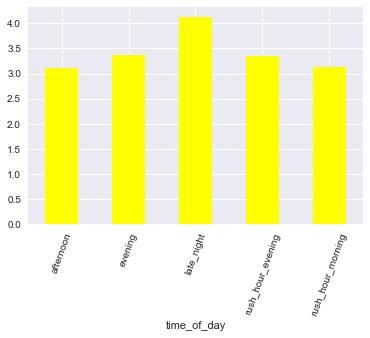

In [83]:
df.sort_values(by='time_of_day', ascending=True) #Representing how the average distance varies as time of the day changes
temp = df.groupby(by='time_of_day').mean()['distance']
print(temp)
plt.subplots(figsize=(6,4))
temp.plot(kind='bar', rot=70, color='yellow')
plt.show()

time_of_day
afternoon             963.922746
evening               893.595329
late_night            866.095457
rush_hour_evening    1024.494552
rush_hour_morning     918.488716
Name: trip_duration, dtype: float64


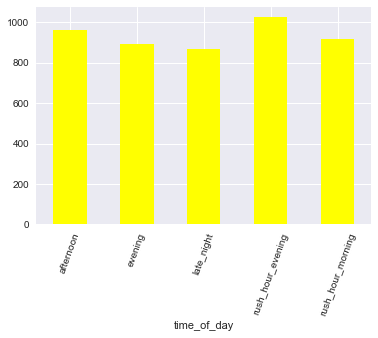

In [84]:
df.sort_values(by='time_of_day', ascending=True)#Representing how the trip duration varies as time of the day changes
temp = df.groupby(by='time_of_day').mean()['trip_duration']
print(temp)
plt.subplots(figsize=(6,4))
temp.plot(kind='bar', rot=70, color='yellow')
plt.show()

In [85]:
one_passenger = df[['distance']][df['passenger_count'] < 2]  
many_passengers = df[['distance']][df['passenger_count'] > 1]
#Separating the distance column according to the passanger_count values to make the ttest

stats.ttest_ind(one_passenger,many_passengers) 
#The pvalue is smaller then 0.05 so we can reject null hypothesis and say passenger group size did affect the distance

Ttest_indResult(statistic=array([-4.95641975]), pvalue=array([7.19030739e-07]))

In [86]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], errors='coerce')
day_name = df['pickup_datetime'].dt.day_name() #Extracting day names to find which one is weekend and whichone is weekday
week = list()
for k in day_name: #Separating weekends and weekdays for each index and adding to a new list called week
    if (k == 'Saturday' or k == 'Sunday'):
        week.append(2)
    else:
        week.append(0)
df['weekend_or_not'] = week #Insterting the additional column weekend_or_not to make the ttest 
weekend = df[['distance']][df['weekend_or_not'] > 1]
weekday = df[['distance']][df['weekend_or_not'] < 1]
#Separating the distance column according to the weekend_or_not values to make the ttest

stats.ttest_ind(weekend,weekday)
#The pvalue is smaller then 0.05 so we can reject null hypothesis and say trip distances did increased in weekends

Ttest_indResult(statistic=array([5.59206926]), pvalue=array([2.24873188e-08]))